<font size="4">Import libraries</font>

In [2]:
#install some libraries
#!pip install imblearn
#!pip install tensorflow
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Libraries for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

#data preparation libraries
import collections
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler #for scaling columns

#performance/score libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

#for sampling libraries
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.utils import resample

#librarires for warnings
from collections import Counter
import warnings
import time
warnings.filterwarnings("ignore")

<font size="4">Get Information about the Dataset</font>


In [113]:
df = pd.read_csv('creditcard.csv')
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [114]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [115]:
print("Total number of the null values in the dataset:", df.isnull().sum().max())
print('Number of No Frauds:', (df['Class'].value_counts()[0]), "equals to", round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Number of Frauds:', (df['Class'].value_counts()[1]), "equals to", round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Total number of the null values in the dataset: 0
Number of No Frauds: 284315 equals to 99.83 % of the dataset
Number of Frauds: 492 equals to 0.17 % of the dataset


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [117]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Heat Map

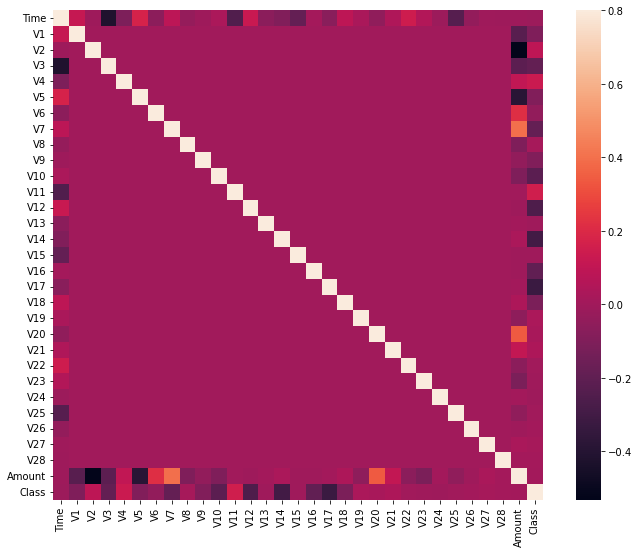

In [118]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

<font size="4">Data Visualization</font>


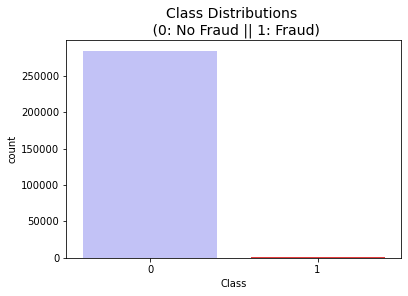

In [119]:
colors = ["#b9b9ff", "#ff2122"]#ff6d92
sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

<font size="4">Prepare data</font>

In [120]:
max(df['Amount']),min(df['Amount']) #that's why I use scaler

(25691.16, 0.0)

In [121]:
print("before remove duplicates:",df.shape)
df.drop_duplicates(inplace=True)
print("after remove duplicates:",df.shape)

before remove duplicates: (284807, 31)
after remove duplicates: (283726, 31)


In [122]:
#Robust Scaler for scaling for time and amount columns
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
#drop unscaled form of the time and amount from dataframe
df.drop(['Time','Amount'], axis=1, inplace=True)

<font size="4">Define Target Class and the Rest</font>



In [123]:
x = df.drop(['Class'], axis=1)
y = df["Class"]

<font size="4">Train/Test Split</font>


In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

<font size="4">Scale the features</font>

In [125]:
std_scaler=StandardScaler()
x_train=std_scaler.fit_transform(x_train)
x_test=std_scaler.fit_transform(x_test)

<font size="4">Sampling Method</font>

<font size="4">SMOTE Over-Sampling Method</font>

In [126]:
smote = SMOTE(random_state = 42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print(sorted(Counter(y_train_smote).items()))

[(0, 212433), (1, 212433)]


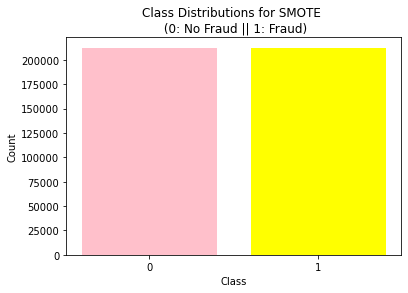

In [127]:
x=(0,1)
y=[y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]
plt.bar(x,y, color=['pink', 'yellow'], tick_label=x)
plt.xlabel('Class')
plt.ylabel("Count")
plt.title('Class Distributions for SMOTE \n (0: No Fraud || 1: Fraud)')
plt.show()

<font size="4">NearMiss Under-Sampling Method</font>

In [128]:
#nearmiss = NearMiss(version=2) 0.46 accuracy
nearmiss = NearMiss(version=1) #0.63 accuracy
x_train_nearmiss, y_train_nearmiss= nearmiss.fit_resample(x_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_nearmiss).items()))

[(0, 361), (1, 361)]


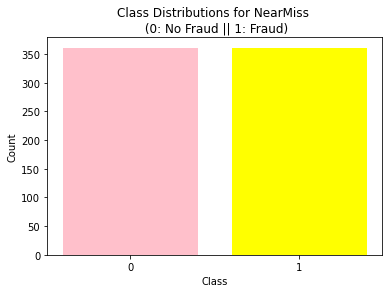

In [129]:
x=(0,1)
y=[y_train_nearmiss.value_counts()[0],y_train_nearmiss.value_counts()[1]]
plt.bar(x,y, color=['pink', 'yellow'], tick_label=x)
plt.xlabel('Class')
plt.ylabel("Count")
plt.title('Class Distributions for NearMiss \n (0: No Fraud || 1: Fraud)')
plt.show()

<font size="4">Supervised Binary Classification Traditional ML Models</font>

<font size="4">1) Logistic Regression</font>

In [130]:
logstart = time.time()
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)
logistic_reg_y_pred = logistic_reg.predict(x_test)
logtime=time.time() - logstart
print(f'Training time for logistic regression model: {logtime}')
logistic_acc = metrics.accuracy_score(y_test, logistic_reg_y_pred)
logistic_recall = metrics.recall_score(y_test, logistic_reg_y_pred)
logistic_roc_auc = metrics.roc_auc_score(y_test, logistic_reg_y_pred)
print(classification_report(y_test, logistic_reg_y_pred))

Training time for logistic regression model: 1.0712575912475586
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.88      0.56      0.68       112

    accuracy                           1.00     70932
   macro avg       0.94      0.78      0.84     70932
weighted avg       1.00      1.00      1.00     70932



In [131]:
nlregstart = time.process_time()
nlogistic_reg = LogisticRegression()
nlogistic_reg.fit(x_train_nearmiss, y_train_nearmiss)
nlogistic_reg_y_pred = nlogistic_reg.predict(x_test)
nlogistic_acc = metrics.accuracy_score(y_test, nlogistic_reg_y_pred)
nlogistic_recall = metrics.recall_score(y_test, nlogistic_reg_y_pred)
nlogistic_roc_auc = metrics.roc_auc_score(y_test, nlogistic_reg_y_pred)
nlregtime=time.process_time() - nlregstart
print(f'Training time for logistic regression model: {nlregtime}')
print(classification_report(y_test, nlogistic_reg_y_pred))

Training time for logistic regression model: 0.25
              precision    recall  f1-score   support

           0       1.00      0.64      0.78     70820
           1       0.00      0.91      0.01       112

    accuracy                           0.64     70932
   macro avg       0.50      0.78      0.39     70932
weighted avg       1.00      0.64      0.78     70932



In [132]:
slregstart = time.process_time()
slogistic_reg = LogisticRegression()
slogistic_reg.fit(x_train_smote, y_train_smote)
slogistic_reg_y_pred = slogistic_reg.predict(x_test)
slogistic_acc = metrics.accuracy_score(y_test, slogistic_reg_y_pred)
slogistic_recall = metrics.recall_score(y_test, slogistic_reg_y_pred)
slogistic_roc_auc = metrics.roc_auc_score(y_test, slogistic_reg_y_pred)
slregtime=time.process_time() - slregstart
print(f'Training time for logistic regression model: {slregtime}')
print(classification_report(y_test, slogistic_reg_y_pred))

Training time for logistic regression model: 6.875
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     70820
           1       0.05      0.91      0.10       112

    accuracy                           0.97     70932
   macro avg       0.53      0.94      0.54     70932
weighted avg       1.00      0.97      0.99     70932



In [133]:
dlog = {'Logistic Regression Model': ["Imbalanced Data","With Undersampling(Near Miss)","With Oversampling(SMOTE)"], 'Accuracy': [logistic_acc,nlogistic_acc,slogistic_acc],'Recall Score': [logistic_recall,nlogistic_recall,slogistic_recall]}
dlog = pd.DataFrame(data=dlog)
dlog

,Logistic Regression Model,Accuracy,Recall Score
0,Imbalanced Data,0.999182,0.562500
1,With Undersampling(Near Miss),0.642348,0.910714
2,With Oversampling(SMOTE),0.974299,0.910714


<font size="4">2) Decision Tree</font>

In [134]:
dtstart = time.process_time()
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(x_train, y_train)
dt_y_pred = dt_model.predict(x_test)
dt_acc = metrics.accuracy_score(y_test, dt_y_pred)
dt_recall = metrics.recall_score(y_test, dt_y_pred)
dt_precison = metrics.precision_score(y_test, dt_y_pred)
dt_roc_auc = metrics.roc_auc_score(y_test, dt_y_pred)
dttime=time.process_time() - dtstart
print(f'Training time for logistic regression model: {dttime}')
print(classification_report(y_test, dt_y_pred))

Training time for logistic regression model: 19.484375
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.48      0.75      0.58       112

    accuracy                           1.00     70932
   macro avg       0.74      0.87      0.79     70932
weighted avg       1.00      1.00      1.00     70932



In [135]:
ndtstart = time.process_time()
ndt_model = DecisionTreeClassifier(random_state=0)
ndt_model.fit(x_train_nearmiss, y_train_nearmiss)
ndt_y_pred = ndt_model.predict(x_test)
ndt_acc = metrics.accuracy_score(y_test, ndt_y_pred)
ndt_recall = metrics.recall_score(y_test, ndt_y_pred)
ndt_precison = metrics.precision_score(y_test, ndt_y_pred)
ndt_roc_auc = metrics.roc_auc_score(y_test, ndt_y_pred)
ndttime=time.process_time() - ndtstart
print(f'Training time for logistic regression model: {ndttime}')
print(classification_report(y_test, ndt_y_pred))

Training time for logistic regression model: 0.140625
              precision    recall  f1-score   support

           0       1.00      0.12      0.21     70820
           1       0.00      0.98      0.00       112

    accuracy                           0.12     70932
   macro avg       0.50      0.55      0.11     70932
weighted avg       1.00      0.12      0.21     70932



In [136]:
sdtstart = time.process_time()
sdt_model = DecisionTreeClassifier(random_state=0)
sdt_model.fit(x_train_smote, y_train_smote)
sdt_y_pred = sdt_model.predict(x_test)
sdt_acc = metrics.accuracy_score(y_test, sdt_y_pred)
sdt_recall = metrics.recall_score(y_test, sdt_y_pred)
sdt_precison = metrics.precision_score(y_test, sdt_y_pred)
sdt_roc_auc = metrics.roc_auc_score(y_test, sdt_y_pred)
sdttime=time.process_time() - sdtstart
print(f'Training time for logistic regression model: {sdttime}')
print(classification_report(y_test, sdt_y_pred))

Training time for logistic regression model: 37.6875
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.33      0.79      0.47       112

    accuracy                           1.00     70932
   macro avg       0.67      0.89      0.73     70932
weighted avg       1.00      1.00      1.00     70932



In [138]:
ddt = {'Decision Tree Model': ["Imbalanced Data","With Undersampling(Near Miss)","With Oversampling(SMOTE)"], 'Accuracy': [dt_acc, ndt_acc, sdt_acc],'Recall Score': [dt_recall, ndt_recall,sdt_recall]}
ddt = pd.DataFrame(data=ddt)
ddt

,Decision Tree Model,Accuracy,Recall Score
0,Imbalanced Data,0.998308,0.750000
1,With Undersampling(Near Miss),0.118085,0.982143
2,With Oversampling(SMOTE),0.997166,0.785714


<font size="4">3) Random Forest</font>

In [144]:
rfstart = time.time()
rf = RandomForestClassifier(max_depth=5, random_state=0)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_acc = metrics.accuracy_score(y_test, rf_pred)
rf_recall = metrics.recall_score(y_test, rf_pred)
rf_roc_auc = metrics.roc_auc_score(y_test, rf_pred)
rftime=time.time() - rfstart
print(f'Training time for random forest model: {rftime}')
print(classification_report(y_test, rf_pred))

Training time for random forest model: 80.39699125289917
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.95      0.69      0.80       112

    accuracy                           1.00     70932
   macro avg       0.98      0.84      0.90     70932
weighted avg       1.00      1.00      1.00     70932



In [145]:
nrfstart = time.time()
nrf = RandomForestClassifier(max_depth=5, random_state=0)
nrf.fit(x_train_nearmiss, y_train_nearmiss)
nrf_pred = rf.predict(x_test)
nrf_acc = metrics.accuracy_score(y_test, nrf_pred)
nrf_recall = metrics.recall_score(y_test, nrf_pred)
nrf_roc_auc = metrics.roc_auc_score(y_test, nrf_pred)
nrftime=time.time() - nrfstart
print(f'Training time for random forest model: {nrftime}')
print(classification_report(y_test, nrf_pred))

Training time for random forest model: 0.7629671096801758
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.95      0.69      0.80       112

    accuracy                           1.00     70932
   macro avg       0.98      0.84      0.90     70932
weighted avg       1.00      1.00      1.00     70932



In [148]:
srfstart = time.time()
srf = RandomForestClassifier(max_depth=5, random_state=0)
srf.fit(x_train_smote, y_train_smote)
srf_pred = srf.predict(x_test)
srf_acc = metrics.accuracy_score(y_test, srf_pred)
srf_recall = metrics.recall_score(y_test, srf_pred)
srf_roc_auc = metrics.roc_auc_score(y_test, srf_pred)
srftime=time.time() - srfstart
print(f'Training time for random forest model: {srftime}')
print(classification_report(y_test, srf_pred))

Training time for random forest model: 267.99491262435913
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.23      0.86      0.36       112

    accuracy                           1.00     70932
   macro avg       0.62      0.93      0.68     70932
weighted avg       1.00      1.00      1.00     70932



In [149]:
drf = {'Random Forest Model': ["Imbalanced Data","With Undersampling(Near Miss)","With Oversampling(SMOTE)"], 'Accuracy': [rf_acc, nrf_acc, srf_acc],'Recall Score': [rf_recall, nrf_recall,srf_recall]}
drf = pd.DataFrame(data=drf)
drf

,Random Forest Model,Accuracy,Recall Score
0,Imbalanced Data,0.999450,0.687500
1,With Undersampling(Near Miss),0.999450,0.687500
2,With Oversampling(SMOTE),0.995263,0.857143


<font size="4"> CNN</font>

<font size="3"> IMBALANCED CNN</font>

In [67]:
#reshaping the input to 3D for the CNN model
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
x_train.shape, x_test.shape # check the shape again

((213605, 30, 1), (71202, 30, 1))

In [68]:
# import model
model=Sequential()
# layers
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# build ANN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(1, activation='relu'))# accuracy: 0.9365
model.add(Dense(1, activation='sigmoid'))
#model.summary()

In [71]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnnstart = time.time()
history=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))
cnntime=time.time() - cnnstart
print(f'Training time for CNN model: {cnntime}')

Epoch 1/20
6676/6676 [==============================] - 29s 4ms/step - loss: 0.0111 - accuracy: 0.9983 - val_loss: 0.0051 - val_accuracy: 0.9987
Epoch 2/20
6676/6676 [==============================] - 31s 5ms/step - loss: 0.0061 - accuracy: 0.9991 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 3/20
6676/6676 [==============================] - 32s 5ms/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 4/20
6676/6676 [==============================] - 32s 5ms/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 5/20
6676/6676 [==============================] - 32s 5ms/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0025 - val_accuracy: 0.9994
Epoch 6/20
6676/6676 [==============================] - 34s 5ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 7/20
6676/6676 [==============================] - 36s 5ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0030 - val_ac

In [150]:
# evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("train acc: ", train_acc)
print("test acc: ", test_acc)
# predict probabilities for test set
yhat_probs = model.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes = (model.predict(x_test) > 0.5).astype("int32")
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
cnn_acc = accuracy_score(y_test, yhat_classes) # accuracy: (tp + tn) / (p + n)
cnn_auc = roc_auc_score(y_test, yhat_probs)
print(cnn_auc)

train acc:  0.9994522333145142
test acc:  0.9993539452552795
2226/2226 [==============================] - 6s 3ms/step
0.9853807834302681


<font size="3"> NEARMISS CNN</font>

In [86]:
#reshaping the input to 3D for the CNN model
x_train_nearmiss=x_train_nearmiss.reshape(x_train_nearmiss.shape[0],x_train_nearmiss.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
x_train_nearmiss.shape, x_test.shape # check the shape again

((758, 30, 1), (71202, 30, 1))

In [91]:
# import model
nmodel=Sequential()
# layers
nmodel.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=x_train_nearmiss[0].shape))
nmodel.add(BatchNormalization())
nmodel.add(Dropout(0.2))
nmodel.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
nmodel.add(BatchNormalization())
nmodel.add(Dropout(0.2))
# build ANN
nmodel.add(Flatten())
nmodel.add(Dense(64, activation='relu'))
nmodel.add(Dropout(0.5))
#model.add(Dense(1, activation='relu'))# accuracy: 0.9365
nmodel.add(Dense(1, activation='sigmoid'))
#model.summary()

In [92]:
nmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ncnnstart = time.time()
nhistory=nmodel.fit(x_train_nearmiss,y_train_nearmiss,epochs=20,validation_data=(x_test,y_test))
ncnntime=time.time() - cnnstart
print(f'Training time for CNN model: {ncnntime}')

Epoch 1/20
24/24 [==============================] - 3s 99ms/step - loss: 0.2887 - accuracy: 0.9024 - val_loss: 0.8348 - val_accuracy: 0.1752
Epoch 2/20
24/24 [==============================] - 2s 104ms/step - loss: 0.1721 - accuracy: 0.9459 - val_loss: 0.7853 - val_accuracy: 0.4056
Epoch 3/20
24/24 [==============================] - 2s 103ms/step - loss: 0.1408 - accuracy: 0.9551 - val_loss: 0.9136 - val_accuracy: 0.1146
Epoch 4/20
24/24 [==============================] - 2s 100ms/step - loss: 0.1386 - accuracy: 0.9604 - val_loss: 1.0597 - val_accuracy: 0.0792
Epoch 5/20
24/24 [==============================] - 2s 99ms/step - loss: 0.1040 - accuracy: 0.9644 - val_loss: 1.3378 - val_accuracy: 0.0424
Epoch 6/20
24/24 [==============================] - 2s 108ms/step - loss: 0.1199 - accuracy: 0.9617 - val_loss: 1.4741 - val_accuracy: 0.0532
Epoch 7/20
24/24 [==============================] - 3s 120ms/step - loss: 0.0978 - accuracy: 0.9697 - val_loss: 1.5155 - val_accuracy: 0.1098
Epoch 8/

In [95]:
# evaluate the model
_, ntrain_acc = nmodel.evaluate(x_train_nearmiss, y_train_nearmiss, verbose=0)
_, ntest_acc = nmodel.evaluate(x_test, y_test, verbose=0)
print("train acc: ", ntrain_acc)
print("test acc: ", ntest_acc)
# predict probabilities for test set
nyhat_probs = nmodel.predict(x_test, verbose=0)
# predict crisp classes for test set
nyhat_classes = (nmodel.predict(x_test) > 0.5).astype("int32")
# reduce to 1d array
nyhat_probs = nyhat_probs[:, 0]
nyhat_classes = nyhat_classes[:, 0]
ncnn_acc = accuracy_score(y_test, nyhat_classes) # accuracy: (tp + tn) / (p + n)
ncnn_auc = roc_auc_score(y_test, nyhat_probs)
print(ncnn_auc)

train acc:  0.9868074059486389
test acc:  0.30457010865211487
2226/2226 [==============================] - 2s 1ms/step
0.8825707324123306


<font size="3"> SMOTE CNN</font>

In [96]:
#reshaping the input to 3D for the CNN model
x_train_smote=x_train_smote.reshape(x_train_smote.shape[0],x_train_smote.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
x_train_smote.shape, x_test.shape # check the shape again

((426452, 30, 1), (71202, 30, 1))

In [97]:
# import model
smodel=Sequential()
# layers
smodel.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=x_train_smote[0].shape))
smodel.add(BatchNormalization())
smodel.add(Dropout(0.2))
smodel.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
smodel.add(BatchNormalization())
smodel.add(Dropout(0.2))
# build ANN
smodel.add(Flatten())
smodel.add(Dense(64, activation='relu'))
smodel.add(Dropout(0.5))
#model.add(Dense(1, activation='relu'))# accuracy: 0.9365
smodel.add(Dense(1, activation='sigmoid'))
#model.summary()

In [98]:
smodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
scnnstart = time.time()
shistory=smodel.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))
scnntime=time.time() - cnnstart
print(f'Training time for CNN model: {scnntime}')

Epoch 1/20
6676/6676 [==============================] - 35s 5ms/step - loss: 0.0097 - accuracy: 0.9987 - val_loss: 0.0040 - val_accuracy: 0.9992
Epoch 2/20
6676/6676 [==============================] - 41s 6ms/step - loss: 0.0058 - accuracy: 0.9991 - val_loss: 0.0043 - val_accuracy: 0.9991
Epoch 3/20
6676/6676 [==============================] - 36s 5ms/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 4/20
6676/6676 [==============================] - 41s 6ms/step - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 5/20
6676/6676 [==============================] - 41s 6ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 6/20
6676/6676 [==============================] - 39s 6ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 7/20
6676/6676 [==============================] - 41s 6ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0030 - val_ac

In [99]:
# evaluate the model
_, strain_acc = smodel.evaluate(x_train_smote, y_train_smote, verbose=0)
_, stest_acc = smodel.evaluate(x_test, y_test, verbose=0)
print("train acc: ", strain_acc)
print("test acc: ", stest_acc)
# predict probabilities for test set
syhat_probs = smodel.predict(x_test, verbose=0)
# predict crisp classes for test set
syhat_classes = (smodel.predict(x_test) > 0.5).astype("int32")
# reduce to 1d array
syhat_probs = syhat_probs[:, 0]
syhat_classes = syhat_classes[:, 0]
scnn_acc = accuracy_score(y_test, syhat_classes) # accuracy: (tp + tn) / (p + n)
scnn_auc = roc_auc_score(y_test, syhat_probs)
print(scnn_auc)

train acc:  0.8994259834289551
test acc:  0.9994101524353027
2226/2226 [==============================] - 3s 1ms/step
0.9886187786293561


<font size="3">ACCURACY AND LOSS PLOT OF CNN MODELS</font>

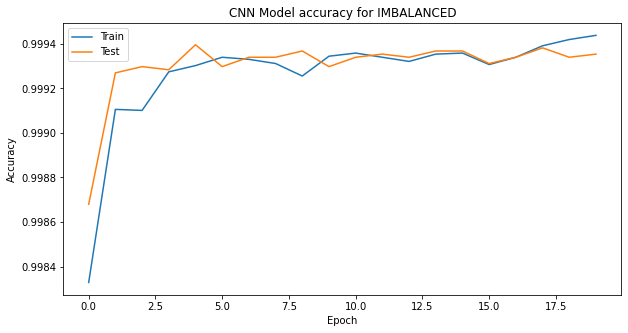

In [184]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("CNN Model accuracy for IMBALANCED")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

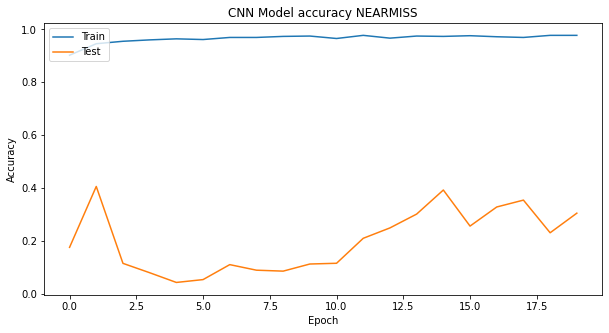

In [185]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(nhistory.history["accuracy"])
plt.plot(nhistory.history["val_accuracy"])
plt.title("CNN Model accuracy NEARMISS")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

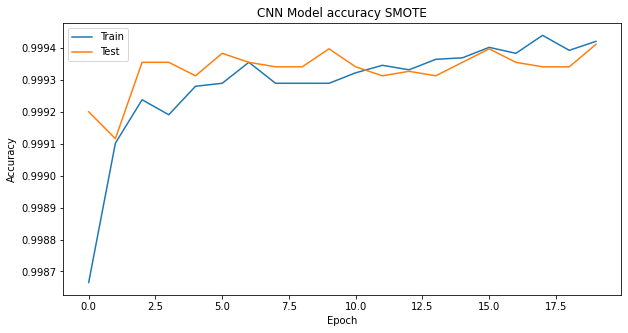

In [186]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(shistory.history["accuracy"])
plt.plot(shistory.history["val_accuracy"])
plt.title("CNN Model accuracy SMOTE")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

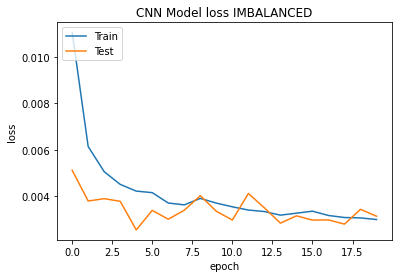

In [187]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model loss IMBALANCED')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

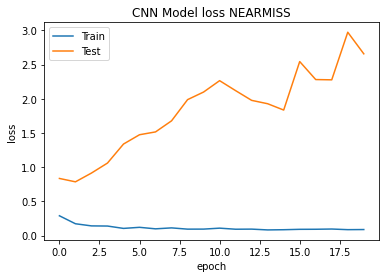

In [188]:
plt.plot(nhistory.history['loss'])
plt.plot(nhistory.history['val_loss'])
plt.title('CNN Model loss NEARMISS')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

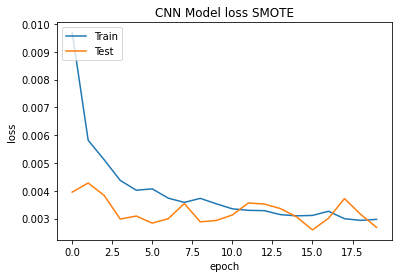

In [189]:
plt.plot(shistory.history['loss'])
plt.plot(shistory.history['val_loss'])
plt.title('CNN Model loss SMOTE')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<font size="3">CONFUSION MATRIX ALL MODELS</font>

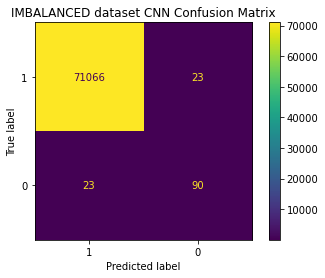

In [109]:
confusion_matrix = metrics.confusion_matrix(y_test, yhat_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 0])
cm_display.plot()
plt.title("IMBALANCED dataset CNN Confusion Matrix")
plt.show()

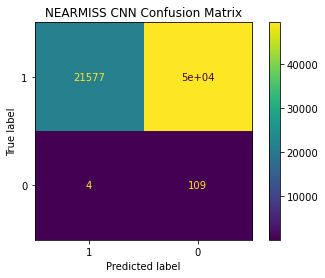

In [110]:
confusion_matrix = metrics.confusion_matrix(y_test, nyhat_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 0])
cm_display.plot()
plt.title("NEARMISS CNN Confusion Matrix")
plt.show()

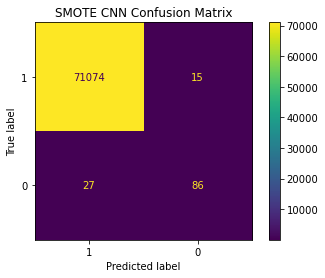

In [111]:
confusion_matrix = metrics.confusion_matrix(y_test, syhat_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 0])
cm_display.plot()
plt.title("SMOTE CNN Confusion Matrix")
plt.show()

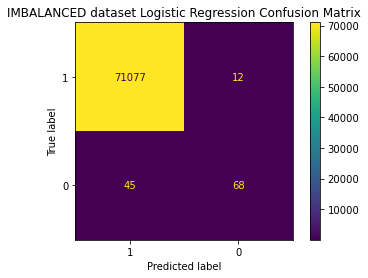

In [112]:
confusion_matrix = metrics.confusion_matrix(y_test, logistic_reg_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 0])
cm_display.plot()
plt.title("IMBALANCED dataset Logistic Regression Confusion Matrix")
plt.show()

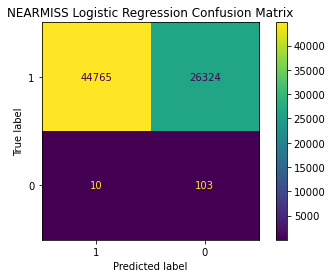

In [113]:
confusion_matrix = metrics.confusion_matrix(y_test, nlogistic_reg_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 0])
cm_display.plot()
plt.title("NEARMISS Logistic Regression Confusion Matrix")
plt.show()

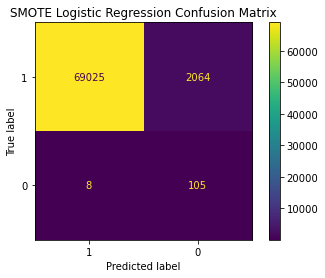

In [114]:
confusion_matrix = metrics.confusion_matrix(y_test, slogistic_reg_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 0])
cm_display.plot()
plt.title("SMOTE Logistic Regression Confusion Matrix")
plt.show()

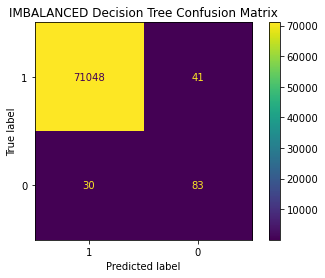

In [119]:
confusion_matrix = metrics.confusion_matrix(y_test, dt_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 0])
cm_display.plot()
plt.title("IMBALANCED Decision Tree Confusion Matrix")
plt.show()

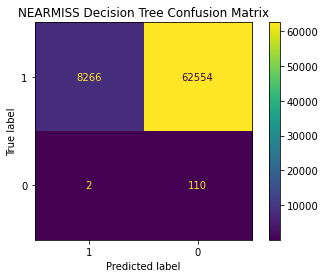

In [181]:
confusion_matrix = metrics.confusion_matrix(y_test, ndt_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 0])
cm_display.plot()
plt.title("NEARMISS Decision Tree Confusion Matrix")
plt.show()

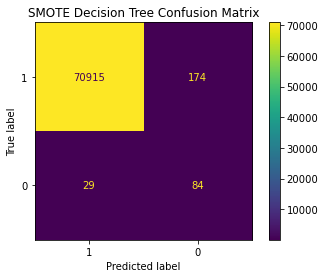

In [121]:
confusion_matrix = metrics.confusion_matrix(y_test, sdt_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 0])
cm_display.plot()
plt.title("SMOTE Decision Tree Confusion Matrix")
plt.show()

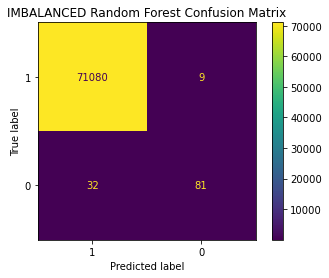

In [115]:
confusion_matrix = metrics.confusion_matrix(y_test, rf_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 0])
cm_display.plot()
plt.title("IMBALANCED Random Forest Confusion Matrix")
plt.show()

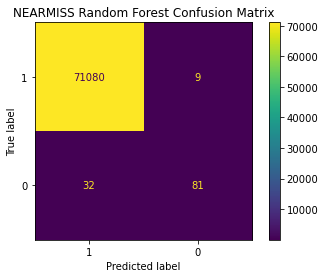

In [116]:
confusion_matrix = metrics.confusion_matrix(y_test, nrf_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 0])
cm_display.plot()
plt.title("NEARMISS Random Forest Confusion Matrix")
plt.show()

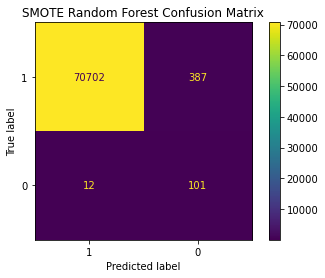

In [117]:
confusion_matrix = metrics.confusion_matrix(y_test, srf_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 0])
cm_display.plot()
plt.title("SMOTE Random Forest Confusion Matrix")
plt.show()

<font size="4">Improving Credit Card Fraud Detection based on CNN </font>

In [37]:
non_fraud = df[df['Class']==0]
fraud = df[df['Class']==1]

In [38]:
nfraud_downsampled = resample(non_fraud, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(fraud),  # to match minority class
                                 random_state=27)

In [39]:
df_downsampled = pd.concat([nfraud_downsampled, fraud])
df_downsampled.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [40]:
x = df_downsampled.drop("Class", axis = 1)
y = df_downsampled.Class
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [41]:
scaler = StandardScaler()


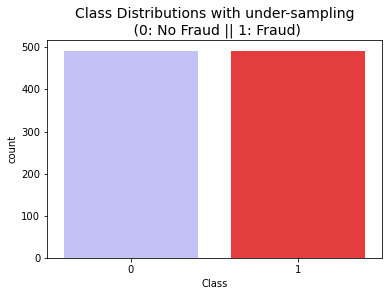

In [42]:
colors = ["#b9b9ff", "#ff2122"]#ff6d92
sns.countplot('Class', data=df_downsampled, palette=colors)
plt.title('Class Distributions with under-sampling\n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

In [43]:
xtrain = df_downsampled.drop(['Class'], axis=1)
ytrain = df_downsampled.Class

In [44]:
xtrain, xtest, ytrain, ytest = train_test_split(xtrain,ytrain,test_size=0.2,random_state=99)
ytrain.shape

(787,)

In [45]:
scaler = StandardScaler()
scaled_xtrain = scaler.fit_transform(xtrain)
scaled_xtest = scaler.fit_transform(xtest)

In [46]:
#reshaping the input to 3D for the CNN model
scaled_xtrain=scaled_xtrain.reshape(scaled_xtrain.shape[0],scaled_xtrain.shape[1],1)
scaled_xtest=scaled_xtest.reshape(scaled_xtest.shape[0],scaled_xtest.shape[1],1)

# check the shape again
scaled_xtrain.shape, scaled_xtest.shape

((787, 30, 1), (197, 30, 1))

In [47]:
# import model
dmodel=Sequential()
# layers
dmodel.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=scaled_xtrain[0].shape))
dmodel.add(BatchNormalization())
dmodel.add(Dropout(0.2))

dmodel.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
dmodel.add(BatchNormalization())
dmodel.add(Dropout(0.2))

# build ANN
dmodel.add(Flatten())
dmodel.add(Dense(64, activation='relu'))
dmodel.add(Dropout(0.5))
#model.add(Dense(1, activation='relu'))# accuracy: 0.9365
dmodel.add(Dense(1, activation='sigmoid'))

In [48]:
dmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_4 (Batc  (None, 29, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 29, 32)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_5 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 28, 64)           

In [49]:
dmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
dcnnstart = time.time()
history=dmodel.fit(scaled_xtrain,ytrain,epochs=20,validation_data=(scaled_xtest,ytest))
dcnntime=time.time() - dcnnstart
print(f'Training time for CNN model: {dcnntime}')

Epoch 1/20
25/25 [==============================] - 1s 25ms/step - loss: 0.0812 - accuracy: 0.9670 - val_loss: 0.1654 - val_accuracy: 0.9391
Epoch 2/20
25/25 [==============================] - 1s 21ms/step - loss: 0.0736 - accuracy: 0.9695 - val_loss: 0.1612 - val_accuracy: 0.9442
Epoch 3/20
25/25 [==============================] - 0s 20ms/step - loss: 0.0631 - accuracy: 0.9720 - val_loss: 0.1698 - val_accuracy: 0.9442
Epoch 4/20
25/25 [==============================] - 1s 20ms/step - loss: 0.0547 - accuracy: 0.9797 - val_loss: 0.1590 - val_accuracy: 0.9442
Epoch 5/20
25/25 [==============================] - 1s 20ms/step - loss: 0.0764 - accuracy: 0.9733 - val_loss: 0.1577 - val_accuracy: 0.9442
Epoch 6/20
25/25 [==============================] - 0s 20ms/step - loss: 0.0703 - accuracy: 0.9759 - val_loss: 0.1767 - val_accuracy: 0.9391
Epoch 7/20
25/25 [==============================] - 0s 20ms/step - loss: 0.0768 - accuracy: 0.9695 - val_loss: 0.1559 - val_accuracy: 0.9340
Epoch 8/20
25

In [52]:
# evaluate the model
_, dtrain_acc = dmodel.evaluate(scaled_xtrain, ytrain, verbose=0)
_, dtest_acc = dmodel.evaluate(scaled_xtest, ytest, verbose=0)

In [53]:
print("train acc: ", dtrain_acc)
print("test acc: ", dtest_acc)

train acc:  1.0
test acc:  0.9441624283790588


In [54]:
# predict probabilities for test set
dyhat_probs = dmodel.predict(scaled_xtest, verbose=0)
# predict crisp classes for test set
dyhat_classes = (dmodel.predict(scaled_xtest) > 0.5).astype("int32")


7/7 [==============================] - 0s 6ms/step


In [55]:
# reduce to 1d array
dyhat_probs = dyhat_probs[:, 0]
dyhat_classes = dyhat_classes[:, 0]

In [57]:
dcnn_acc = accuracy_score(ytest, dyhat_classes) # accuracy: (tp + tn) / (p + n)
print('Accuracy: %f' % dcnn_acc)

dcnn_precision = precision_score(ytest, dyhat_classes) # precision tp / (tp + fp)
print('Precision: %f' % dcnn_precision)

dcnn_recall = recall_score(ytest, dyhat_classes) # recall: tp / (tp + fn)
print('Recall: %f' % dcnn_recall)

dcnn_f1 = f1_score(ytest, dyhat_classes) # f1: 2 tp / (2 tp + fp + fn)
print('F1 score: %f' % dcnn_f1)

dcnn_auc = roc_auc_score(ytest, dyhat_probs)
print('ROC AUC: %f' % dcnn_auc)

Accuracy: 0.944162
Precision: 0.960000
Recall: 0.932039
F1 score: 0.945813
ROC AUC: 0.976968


In [58]:
d = {'Model': ['CNN'], 'Accuracy Score': [dcnn_acc],'Recall Score': [dcnn_recall],'F1 Score': [dcnn_f1],'Precision Score': [dcnn_precision],'ROC-AUC Score': [dcnn_auc],'Time': [dcnntime]}
score_df = pd.DataFrame(data=d)
score_df.style.set_caption("Down-Sampling Dataset and CNN Model with their performance metrics ")

,Model,Accuracy Score,Recall Score,F1 Score,Precision Score,ROC-AUC Score,Time
0,CNN,0.944162,0.932039,0.945813,0.960000,0.976968,10.506782


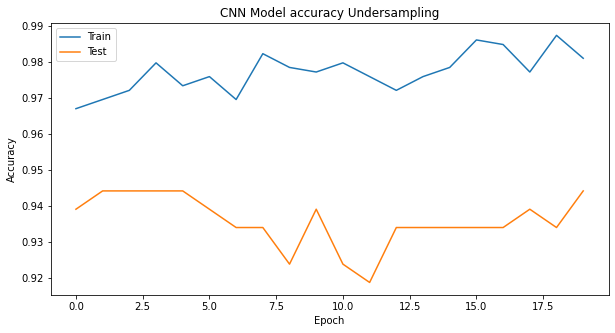

In [60]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("CNN Model accuracy Undersampling")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

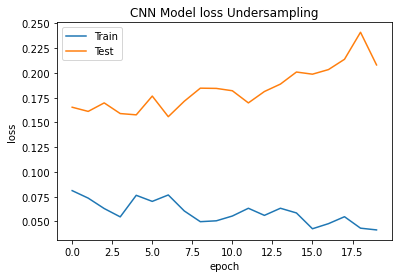

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model loss Undersampling')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [104]:
# import model
from keras.layers import Conv1D, MaxPool1D
dmodel=Sequential()
# layers
dmodel.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=scaled_xtrain[0].shape))
dmodel.add(BatchNormalization())
dmodel.add(Dropout(0.2))

dmodel.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
dmodel.add(BatchNormalization())
dmodel.add(MaxPool1D(2))
dmodel.add(Dropout(0.2))

# build ANN
dmodel.add(Flatten())
dmodel.add(Dense(64, activation='relu'))
dmodel.add(Dropout(0.5))
#dmodel.add(Dense(1, activation='relu'))# accuracy: 0.9365
dmodel.add(Dense(1, activation='sigmoid'))

In [105]:
dmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [106]:
dcnnstart = time.time()
history=dmodel.fit(scaled_xtrain,ytrain,epochs=20,validation_data=(scaled_xtest,ytest))
dcnntime=time.time() - dcnnstart
print(f'Training time for CNN model: {dcnntime}')

Epoch 1/20
25/25 [==============================] - 6s 47ms/step - loss: 0.4861 - accuracy: 0.8196 - val_loss: 0.5343 - val_accuracy: 0.8528
Epoch 2/20
25/25 [==============================] - 1s 25ms/step - loss: 0.2233 - accuracy: 0.9250 - val_loss: 0.5002 - val_accuracy: 0.8223
Epoch 3/20
25/25 [==============================] - 1s 25ms/step - loss: 0.1934 - accuracy: 0.9301 - val_loss: 0.4636 - val_accuracy: 0.7817
Epoch 4/20
25/25 [==============================] - 1s 25ms/step - loss: 0.1923 - accuracy: 0.9187 - val_loss: 0.4375 - val_accuracy: 0.7817
Epoch 5/20
25/25 [==============================] - 1s 25ms/step - loss: 0.1782 - accuracy: 0.9327 - val_loss: 0.4248 - val_accuracy: 0.8020
Epoch 6/20
25/25 [==============================] - 1s 25ms/step - loss: 0.1578 - accuracy: 0.9416 - val_loss: 0.4014 - val_accuracy: 0.8122
Epoch 7/20
25/25 [==============================] - 1s 25ms/step - loss: 0.1439 - accuracy: 0.9441 - val_loss: 0.3741 - val_accuracy: 0.8325
Epoch 8/20
25

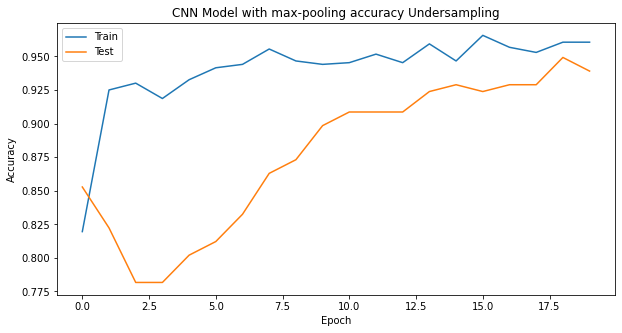

In [107]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("CNN Model with max-pooling accuracy Undersampling")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

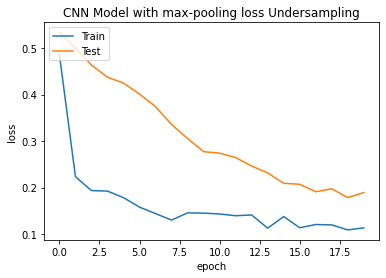

In [108]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model with max-pooling loss Undersampling')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [109]:
# predict probabilities for test set
dyhat_probs = dmodel.predict(scaled_xtest, verbose=0)
# predict crisp classes for test set
dyhat_classes = (dmodel.predict(scaled_xtest) > 0.5).astype("int32")
dyhat_probs = dyhat_probs[:, 0]
dyhat_classes = dyhat_classes[:, 0]

7/7 [==============================] - 0s 7ms/step


In [110]:
dcnn_acc = accuracy_score(ytest, dyhat_classes) # accuracy: (tp + tn) / (p + n)
print('Accuracy: %f' % dcnn_acc)

dcnn_precision = precision_score(ytest, dyhat_classes) # precision tp / (tp + fp)
print('Precision: %f' % dcnn_precision)

dcnn_recall = recall_score(ytest, dyhat_classes) # recall: tp / (tp + fn)
print('Recall: %f' % dcnn_recall)

dcnn_f1 = f1_score(ytest, dyhat_classes) # f1: 2 tp / (2 tp + fp + fn)
print('F1 score: %f' % dcnn_f1)

dcnn_auc = roc_auc_score(ytest, dyhat_probs)
print('ROC AUC: %f' % dcnn_auc)

Accuracy: 0.939086
Precision: 0.978947
Recall: 0.902913
F1 score: 0.939394
ROC AUC: 0.975005


In [111]:
#max pooling ile